## Importing Data dan membuat Grouping

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [ ]:
# Memuat Dataset

url_shopping = "/content/shopping_trends_updated.csv"
df = pd.read_csv(url_shopping)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df_new = df.copy()

# Previous Score

bins = [0, 13, 26, 39, np.inf]  # Sesuaikan batas interval sesuai kebutuhan
labels = ['1', '2', '3', '4']
df_new['Previous Score'] = pd.cut(df_new['Previous Purchases'], bins=bins, labels=labels)

# Age Division

bins = [17, 25, 36, 50, np.inf]  # Sesuaikan batas interval sesuai kebutuhan
labels = ['Young Adults', 'Middle-aged Adults', 'Old Adults', 'Elderly']
df_new['Age Division'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Customer Classes Division

bins = [19, 39, 59, 79, np.inf]  # Sesuaikan batas interval sesuai kebutuhan
labels = ['Low-Value Customers', 'Regular Customers', 'High-Value Customers', 'Very High-Value Customers']
df_new['Customer Classes Division'] = pd.cut(df['Purchase Amount (USD)'], bins=bins, labels=labels)

In [ ]:
#Segment

df_new['Segment'] = np.select(
    [(df_new['Frequency of Purchases'].isin(['Fortnightly', 'Weekly'])) & (df_new['Previous Score'] >= '3'),
     (df_new['Frequency of Purchases'].isin(['Fortnightly', 'Weekly'])) & (df_new['Previous Score'] < '3'),
     (df_new['Frequency of Purchases'].isin(['Annually', 'Quarterly'])) & (df_new['Previous Score'] >= '3'),
     (df_new['Frequency of Purchases'].isin(['Annually', 'Quarterly'])) & (df_new['Previous Score'] < '3'),
     (df_new['Frequency of Purchases'].isin(['Bi-Weekly', 'Monthly'])) & (df_new['Previous Score'] >= '3'),
     (df_new['Frequency of Purchases'].isin(['Bi-Weekly', 'Monthly'])) & (df_new['Previous Score'] < '3'),
     (df_new['Frequency of Purchases'] == 'Every 3 Months') & (df_new['Previous Score'] >= '3'),
     (df_new['Frequency of Purchases'] == 'Every 3 Months') & (df_new['Previous Score'] < '3')],

    ['01-Champion', '02-Loyal Customers', '03-Potential Loyalists', "04-Can't Lose Them", '05-Need Attention',
     '06-New Customers', '07-About to Sleep', '08-Hibernating']
)
df_new.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Previous Score,Age Division,Customer Classes Division,Segment
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,2,Elderly,Regular Customers,02-Loyal Customers
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,1,Young Adults,High-Value Customers,02-Loyal Customers
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2,Old Adults,High-Value Customers,02-Loyal Customers
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,4,Young Adults,Very High-Value Customers,01-Champion
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,3,Old Adults,Regular Customers,03-Potential Loyalists


## Pengecekan Data / Kolom

In [ ]:
# Mengecek Nilai max (kalau mau min tinggal diganti maxnya)

df_new['Purchase Amount (USD)'].max()

100

In [ ]:
# untuk menghapus kolom

df_new = df_new.drop('previous_score', axis=1)
df_new = df_new.drop('segment', axis=1)

In [ ]:
# untuk menghapus kolom

df_new = df_new.drop('Previous Score', axis=1)
df_new = df_new.drop('Age Division', axis=1)
df_new = df_new.drop('Customer Classes Division', axis=1)
df_new = df_new.drop('Segment', axis=1)

In [ ]:
# Mentotal nilai NaN di suatu kolom

df_new['Customer Classes Division'].isna().sum()

Customer ID                  0
Age                          0
Gender                       0
Item Purchased               0
Category                     0
Purchase Amount (USD)        0
Location                     0
Size                         0
Color                        0
Season                       0
Review Rating                0
Subscription Status          0
Shipping Type                0
Discount Applied             0
Promo Code Used              0
Previous Purchases           0
Payment Method               0
Frequency of Purchases       0
Age Division                 0
Customer Classes Division    0
Previous Score               0
Segment                      0
Cluster                      0
dtype: int64

In [ ]:
# Mengecek nilai unik di 1 kolom (distinct)
df_new['Age Division'].unique()

['4', '1', '3', '2']
Categories (4, object): ['1' < '2' < '3' < '4']

In [ ]:
# Memfilter data dengan filter suatu kolom

df_new[df_new['Cluster'] == 1].sum()

KeyError: ignored

In [ ]:
# Memfilter data dengan filter suatu kolom (NaN)

df_new[df_new['previous_score'].isna()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Customer Classes Division,previous_score,Age Division


In [ ]:
# Mengubah Tipe Data menjadi String

df_new['Age Division'] = df['Age Division'].astype(str)
df_new['Customer Classes Division'] = df['Age Division'].astype(str)
df_new['Previous Score'] = df['Previous Score'].astype(str)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                3900 non-null   int64  
 1   Age                        3900 non-null   int64  
 2   Gender                     3900 non-null   object 
 3   Item Purchased             3900 non-null   object 
 4   Category                   3900 non-null   object 
 5   Purchase Amount (USD)      3900 non-null   int64  
 6   Location                   3900 non-null   object 
 7   Size                       3900 non-null   object 
 8   Color                      3900 non-null   object 
 9   Season                     3900 non-null   object 
 10  Review Rating              3900 non-null   float64
 11  Subscription Status        3900 non-null   object 
 12  Shipping Type              3900 non-null   object 
 13  Discount Applied           3900 non-null   objec

In [ ]:
df_new.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Previous Score,Age Division,Customer Classes Division,Segment
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,2,Elderly,Regular Customers,02-Loyal Customers
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,1,Young Adults,High-Value Customers,02-Loyal Customers
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2,Old Adults,High-Value Customers,02-Loyal Customers
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,4,Young Adults,Very High-Value Customers,01-Champion
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,3,Old Adults,Regular Customers,03-Potential Loyalists


## Data Preparation (EDA)

In [ ]:
# Checking if there are any null values present in the dataset or not ?
df_new.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
#Checking if there are any duplicate values present in the dataset or not ?
df_new.duplicated().sum()

0

## Data Understanding (Infografis)

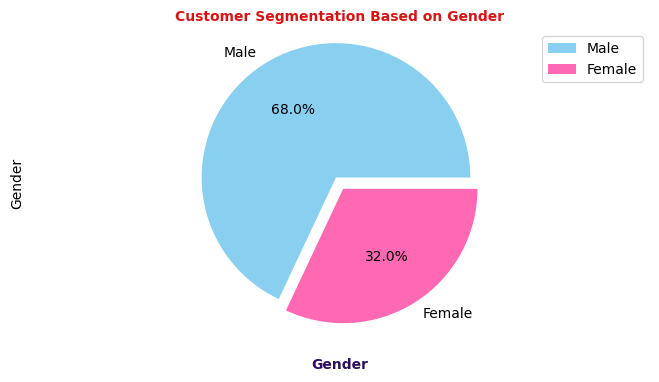

In [ ]:
plt.figure(figsize = (8, 4))

counts = df_new["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 10, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 10, labelpad = 15)
plt.title('Customer Segmentation Based on Gender', weight='bold', color='#D71313', fontsize=10)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

<Figure size 800x400 with 0 Axes>

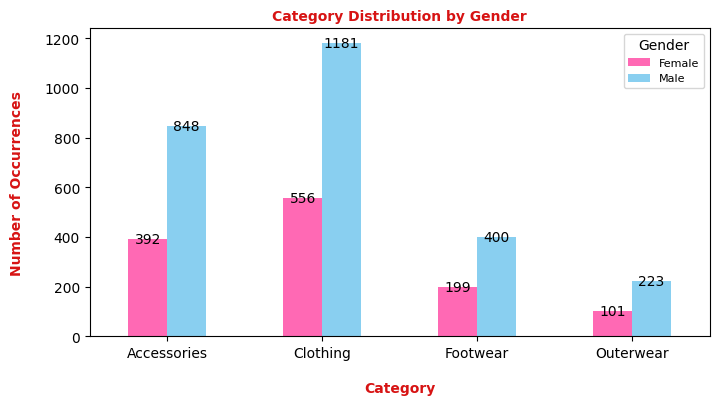

In [ ]:
#Category Distribution by Gender
# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
category_gender = df_new.groupby(['Category', 'Gender']).size().unstack()

# Plotting the grouped bar chart#89CFF0
ax = category_gender.plot(kind='bar', stacked=False, color=['#FF69B4', '#89CFF0'], figsize=(8, 4))


# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Category', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Category Distribution by Gender', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Gender', title_fontsize='10', fontsize='8')

plt.show()

<Figure size 800x400 with 0 Axes>

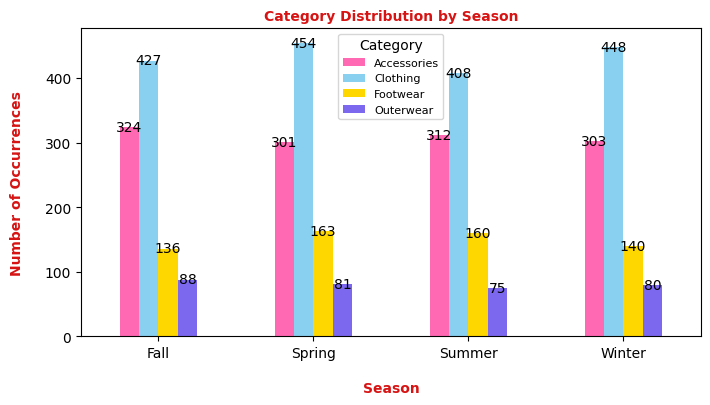

In [ ]:
#Category Distribution by Gender
# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
season_category = df_new.groupby(['Season', 'Category']).size().unstack()

# Plotting the grouped bar chart#89CFF0
ax = season_category.plot(kind='bar', stacked=False, color=['#FF69B4', '#89CFF0', '#FFD700', '#7B68EE'], figsize=(8, 4))


# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Season', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Category Distribution by Season', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Category', title_fontsize='10', fontsize='8')

plt.show()

<Figure size 800x400 with 0 Axes>

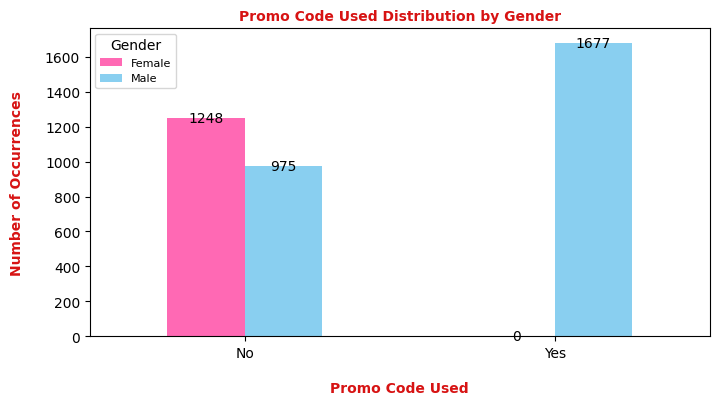

In [ ]:
#Category Distribution by Gender
# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
promo_gender = df_new.groupby(['Promo Code Used', 'Gender']).size().unstack()

# Plotting the grouped bar chart#89CFF0
ax = promo_gender.plot(kind='bar', stacked=False, color=['#FF69B4', '#89CFF0', '#FFD700', '#7B68EE'], figsize=(8, 4))


# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Promo Code Used', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Promo Code Used Distribution by Gender', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Gender', title_fontsize='10', fontsize='8')

plt.show()

<Figure size 800x400 with 0 Axes>

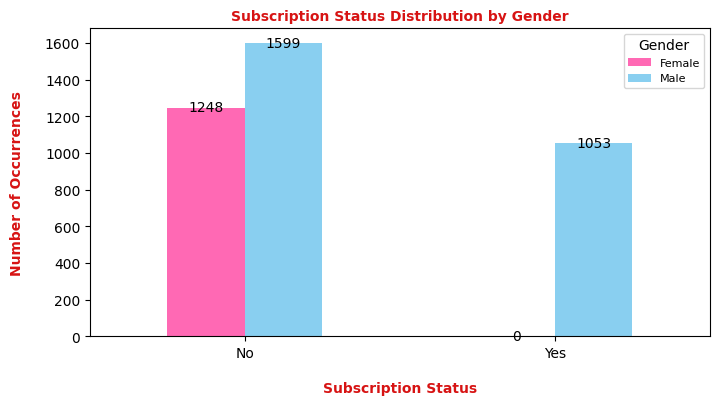

In [ ]:
#Category Distribution by Gender
# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
subs_gender = df_new.groupby(['Subscription Status', 'Gender']).size().unstack()

# Plotting the grouped bar chart#89CFF0
ax = subs_gender.plot(kind='bar', stacked=False, color=['#FF69B4', '#89CFF0', '#FFD700', '#7B68EE'], figsize=(8, 4))


# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Subscription Status', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Subscription Status Distribution by Gender', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Gender', title_fontsize='10', fontsize='8')

plt.show()

## Visualisasi setelah Grouping

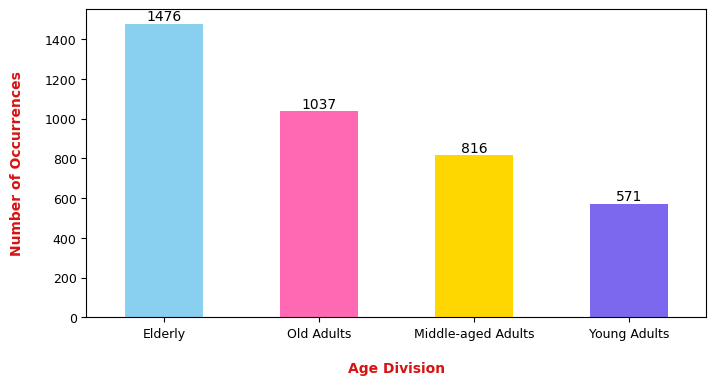

In [ ]:
#Age Division

plt.figure(figsize = (8, 4))
ax = df_new["Age Division"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 9)
plt.xlabel('Age Division', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 15)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 15);

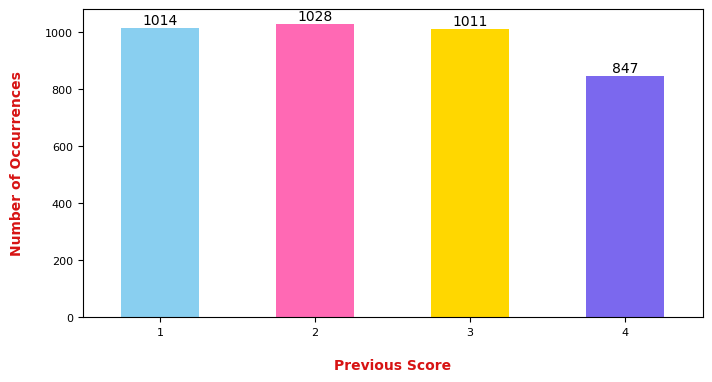

In [ ]:
#Previous Score

plt.figure(figsize=(8, 4))
ax = df_new["Previous Score"].value_counts().sort_index().plot(kind='bar', color=colors, rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')
    ax.tick_params(axis='both', labelsize=8)

plt.xlabel('Previous Score', weight="bold", color="#D71313", fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight="bold", color="#D71313", fontsize=10, labelpad=15)

plt.show()

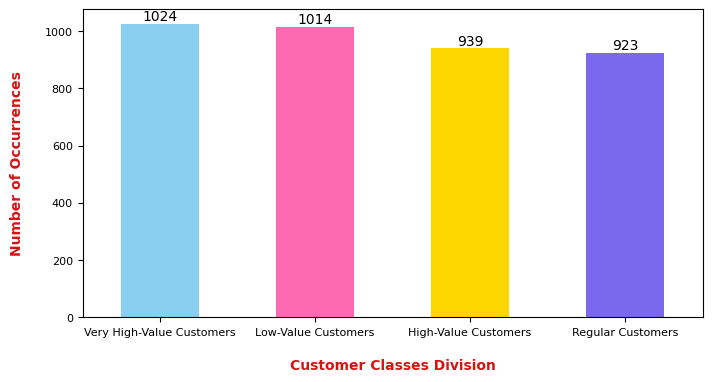

In [ ]:
#Customer Classes Division

plt.figure(figsize = (8, 4))
ax = df_new["Customer Classes Division"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 8)
plt.xlabel('Customer Classes Division', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 15)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 15);

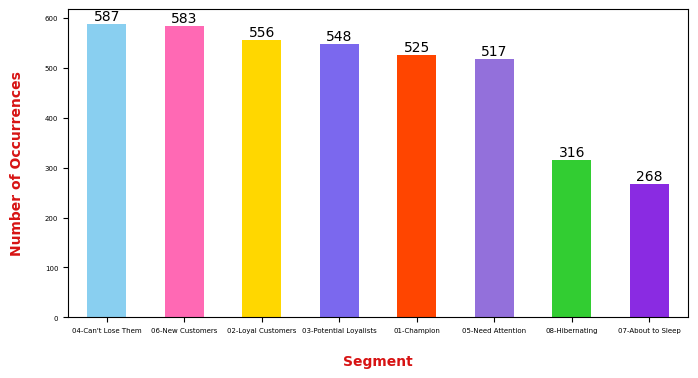

In [ ]:
#Segment

plt.figure(figsize = (8, 4))
ax = df_new["Segment"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 5)
plt.xlabel('Segment', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 15)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 15);

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Customer ID                3900 non-null   int64   
 1   Age                        3900 non-null   int64   
 2   Gender                     3900 non-null   object  
 3   Item Purchased             3900 non-null   object  
 4   Category                   3900 non-null   object  
 5   Purchase Amount (USD)      3900 non-null   int64   
 6   Location                   3900 non-null   object  
 7   Size                       3900 non-null   object  
 8   Color                      3900 non-null   object  
 9   Season                     3900 non-null   object  
 10  Review Rating              3900 non-null   float64 
 11  Subscription Status        3900 non-null   object  
 12  Shipping Type              3900 non-null   object  
 13  Discount Applied           3900 n

## Modelling

In [ ]:
df_new

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Previous Score,Age Division,Customer Classes Division,Segment
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,2,Elderly,Regular Customers,02-Loyal Customers
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,1,Young Adults,High-Value Customers,02-Loyal Customers
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2,Old Adults,High-Value Customers,02-Loyal Customers
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,4,Young Adults,Very High-Value Customers,01-Champion
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,3,Old Adults,Regular Customers,03-Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,2-Day Shipping,No,No,32,Venmo,Weekly,3,Old Adults,Low-Value Customers,01-Champion
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,4,Elderly,Regular Customers,05-Need Attention
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,Standard,No,No,24,Venmo,Quarterly,2,Old Adults,Low-Value Customers,04-Can't Lose Them
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,Express,No,No,24,Venmo,Weekly,2,Old Adults,High-Value Customers,02-Loyal Customers


In [ ]:
import pandas as pd
from google.colab import files

# Menyimpan DataFrame ke file CSV
df_new.to_csv('shopping_trends_FINAL.csv', index=False)

# Mengunduh file CSV
files.download('shopping_trends_FINAL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Clustering

In [ ]:
cluster_data = df_new.loc[:,["Gender", "Category", "Subscription Status", "Promo Code Used", "Previous Score" , "Age Division", "Customer Classes Division", "Segment"]]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#label preprocess all the string field
cluster_data["Gender"] = le.fit_transform(cluster_data["Gender"])
cluster_data["Category"] = le.fit_transform(cluster_data["Category"])
cluster_data["Subscription Status"] = le.fit_transform(cluster_data["Subscription Status"])
cluster_data["Promo Code Used"] = le.fit_transform(cluster_data["Promo Code Used"])
cluster_data["Previous Score"] = le.fit_transform(cluster_data["Previous Score"])
cluster_data["Age Division"] = le.fit_transform(cluster_data["Age Division"])
cluster_data["Customer Classes Division"] = le.fit_transform(cluster_data["Customer Classes Division"])
cluster_data["Segment"] = le.fit_transform(cluster_data["Segment"])



original = cluster_data.copy() #backup

cluster_data = np.log(cluster_data + 1)

#normalization
from sklearn.preprocessing import StandardScaler
Model = StandardScaler()
cluster_data = pd.DataFrame(Model.fit_transform(cluster_data), columns=["Gender", "Category", "Subscription Status", "Promo Code Used", "Previous Score" , "Age Division", "Customer Classes Division", "Segment"])

cluster_data.head()

,Gender,Category,Subscription Status,Promo Code Used,Previous Score,Age Division,Customer Classes Division,Segment
0,0.69,0.22,1.64,1.15,-0.15,-1.18,0.57,-0.86
1,0.69,0.22,1.64,1.15,-1.49,1.38,-1.55,-0.86
2,0.69,0.22,1.64,1.15,-0.15,0.85,-1.55,-0.86
3,0.69,1.11,1.64,1.15,1.20,1.38,1.12,-1.94
4,0.69,0.22,1.64,1.15,0.64,0.85,0.57,-0.23


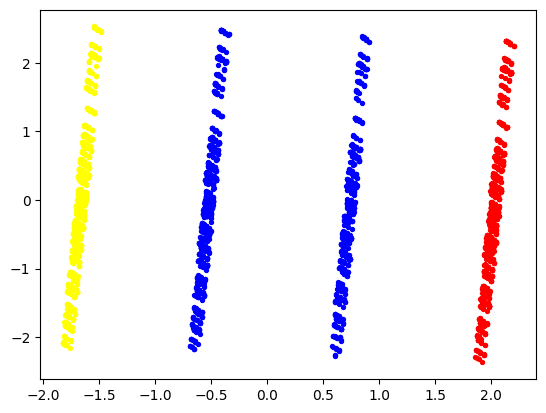

In [ ]:
#train the KMean with the datas
cluster = KMeans(n_clusters=3, init="k-means++").fit(cluster_data)

#plot it into two dimention
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(cluster_data)
decompostion_data = pca.transform(cluster_data)

y_pred = cluster.labels_
centtord = cluster.cluster_centers_
color = ["red", "blue", "yellow", "gray"]
fig, ax = plt.subplots(1)
for i in range(3):
    ax.scatter(decompostion_data[y_pred == i, 0], decompostion_data[y_pred == i, 1], c=color[i], s=8)

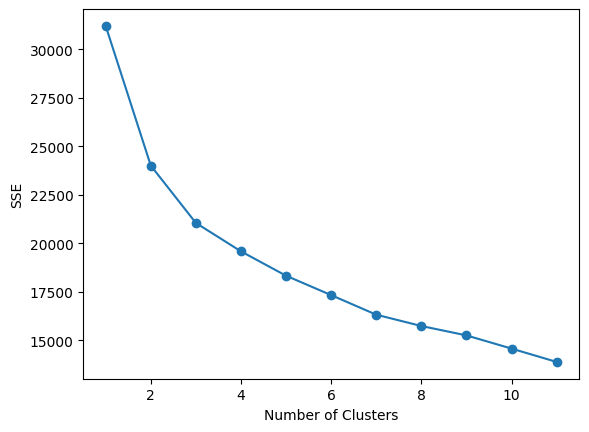

In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
SSE = []
for i in range(1, 12):
    estimator = KMeans(n_clusters=i)
    estimator.fit(cluster_data)
    SSE.append(estimator.inertia_)
X = range(1, 12)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(X, SSE, "o-")
plt.show()

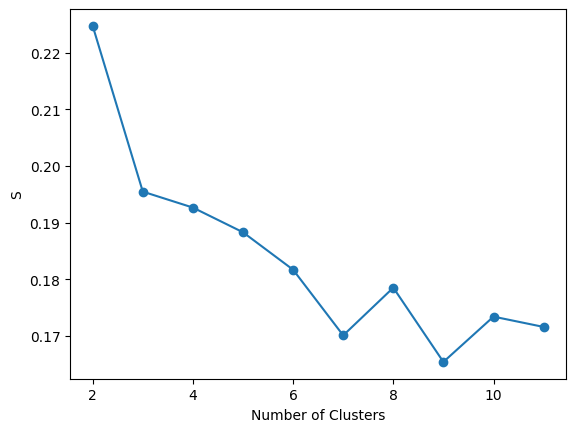

In [ ]:
from sklearn.metrics import silhouette_score
S = []
for i in range(2, 12):
    estimator = KMeans(n_clusters=i)
    estimator.fit(cluster_data)
    S.append(silhouette_score(cluster_data, estimator.labels_, metric="euclidean"))
X = range(2,12)
plt.xlabel("Number of Clusters")
plt.ylabel("S")
plt.plot(X, S, "o-")
plt.show()

In [ ]:
original["Cluster"] = cluster.labels_
final_data = original.groupby(["Cluster"]).mean()
final_data = pd.concat([final_data, original["Cluster"].value_counts().sort_index()],axis=1)
final_data

,Gender,Category,Subscription Status,Promo Code Used,Previous Score,Age Division,Customer Classes Division,Segment,Cluster
0,1.00,1.02,1.00,1.00,1.47,1.17,1.50,3.05,1053
1,1.00,0.99,0.00,0.39,1.44,1.18,1.52,3.14,1599
2,0.00,1.01,0.00,0.00,1.39,1.19,1.55,3.19,1248


In [ ]:
df_new["Cluster"] = cluster.labels_

df_new['Cluster'] = df_new['Cluster'].replace({0: 1, 1: 2, 2: 3})
df_new

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Previous Score,Age Division,Customer Classes Division,Segment,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Yes,14,Venmo,Fortnightly,2,Elderly,Regular Customers,02-Loyal Customers,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Yes,2,Cash,Fortnightly,1,Young Adults,High-Value Customers,02-Loyal Customers,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23,Credit Card,Weekly,2,Old Adults,High-Value Customers,02-Loyal Customers,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49,PayPal,Weekly,4,Young Adults,Very High-Value Customers,01-Champion,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Yes,31,PayPal,Annually,3,Old Adults,Regular Customers,03-Potential Loyalists,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,No,No,32,Venmo,Weekly,3,Old Adults,Low-Value Customers,01-Champion,3
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,No,No,41,Bank Transfer,Bi-Weekly,4,Elderly,Regular Customers,05-Need Attention,3
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,No,No,24,Venmo,Quarterly,2,Old Adults,Low-Value Customers,04-Can't Lose Them,3
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,No,No,24,Venmo,Weekly,2,Old Adults,High-Value Customers,02-Loyal Customers,3


In [ ]:
df_new['Cluster'].unique()

array([3, 1, 2], dtype=int32)

## Visualisasi Modelling

In [ ]:
#List Warna
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

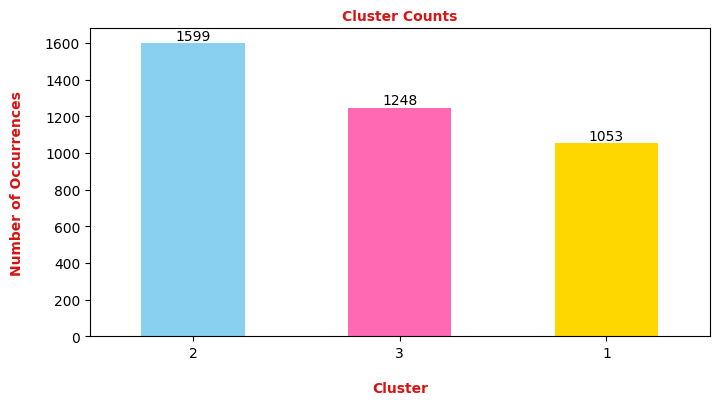

In [ ]:
#Pembagian Per Cluster
plt.figure(figsize = (8, 4))
ax = df_new["Cluster"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 10)
plt.xlabel('Cluster', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 15)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 15)
plt.title('Cluster Counts', weight='bold', color='#D71313', fontsize=10);


<Figure size 800x400 with 0 Axes>

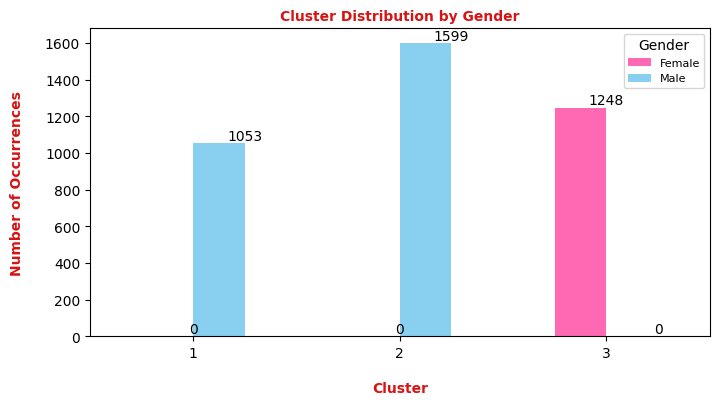

In [ ]:
# Gender
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
cluster_gender_counts = df_new.groupby(['Cluster', 'Gender']).size().unstack()

# Plotting the grouped bar chart
ax = cluster_gender_counts.plot(kind='bar', stacked=False, color=['#FF69B4', '#89CFF0'], figsize=(8, 4))

# Annotating each bar with the number of occurrences
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Cluster', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Cluster Distribution by Gender', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Gender', title_fontsize='10', fontsize='8')

plt.show()

<Figure size 800x400 with 0 Axes>

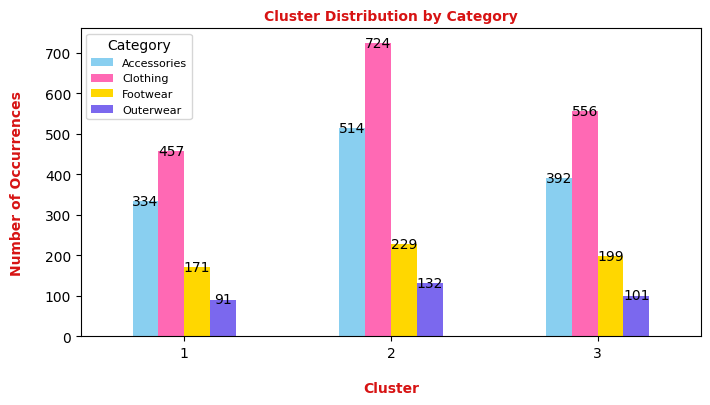

In [ ]:
# Category

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
cluster_gender_counts = df_new.groupby(['Cluster', 'Category']).size().unstack()

# Plotting the grouped bar chart
ax = cluster_gender_counts.plot(kind='bar', stacked=False, color=['#89CFF0', '#FF69B4', '#FFD700', '#7B68EE'], figsize=(8, 4))

# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Cluster', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Cluster Distribution by Category', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Category', title_fontsize='10', fontsize='8')

plt.show()

<Figure size 800x400 with 0 Axes>

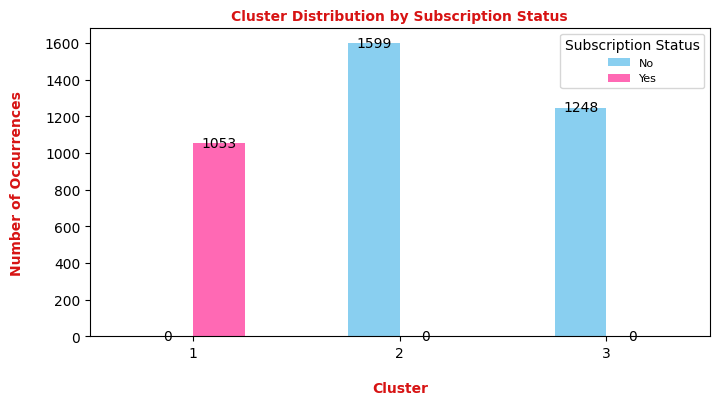

In [ ]:
# Subscription Status

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
cluster_gender_counts = df_new.groupby(['Cluster', 'Subscription Status']).size().unstack()

# Plotting the grouped bar chart
ax = cluster_gender_counts.plot(kind='bar', stacked=False, color=['#89CFF0', '#FF69B4', '#FFD700', '#7B68EE', '#FF4500', '#9370DB'], figsize=(8, 4))

# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Cluster', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Cluster Distribution by Subscription Status', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Subscription Status', title_fontsize='10', fontsize='8')

plt.show()


<Figure size 800x400 with 0 Axes>

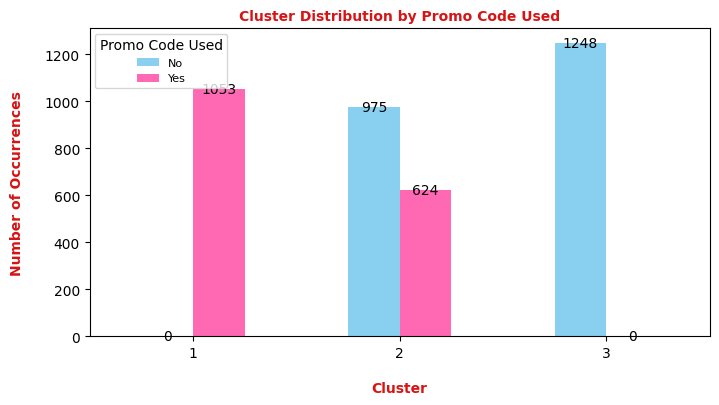

In [ ]:
# Promo Code Used

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
cluster_gender_counts = df_new.groupby(['Cluster', 'Promo Code Used']).size().unstack()

# Plotting the grouped bar chart
ax = cluster_gender_counts.plot(kind='bar', stacked=False, color=['#89CFF0', '#FF69B4', '#FFD700', '#7B68EE', '#FF4500', '#9370DB'], figsize=(8, 4))

# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Cluster', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Cluster Distribution by Promo Code Used', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Promo Code Used', title_fontsize='10', fontsize='8')

plt.show()

<Figure size 800x400 with 0 Axes>

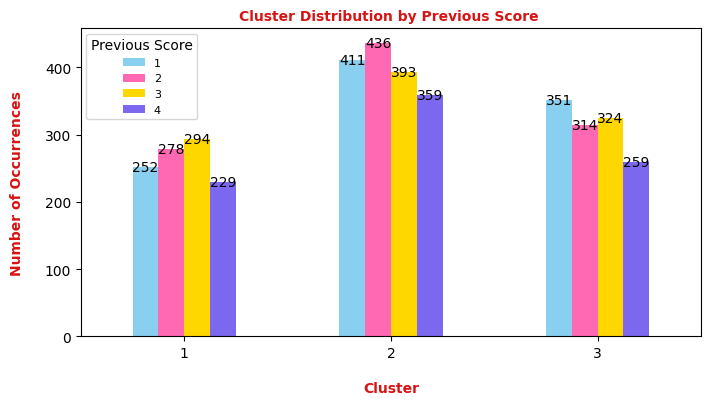

In [ ]:
# Previous Score

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
cluster_gender_counts = df_new.groupby(['Cluster', 'Previous Score']).size().unstack()

# Plotting the grouped bar chart
ax = cluster_gender_counts.plot(kind='bar', stacked=False, color=['#89CFF0', '#FF69B4', '#FFD700', '#7B68EE', '#FF4500', '#9370DB'], figsize=(8, 4))

# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Cluster', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Cluster Distribution by Previous Score ', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Previous Score', title_fontsize='10', fontsize='8')

plt.show()

<Figure size 800x400 with 0 Axes>

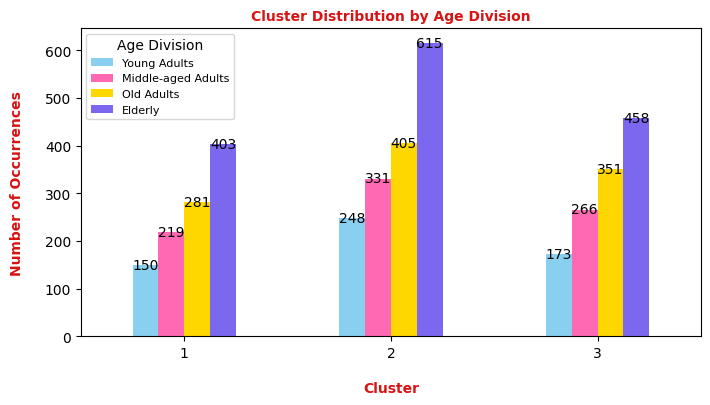

In [ ]:
# Age Division

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
cluster_gender_counts = df_new.groupby(['Cluster', 'Age Division']).size().unstack()

# Plotting the grouped bar chart
ax = cluster_gender_counts.plot(kind='bar', stacked=False, color=['#89CFF0', '#FF69B4', '#FFD700', '#7B68EE', '#FF4500', '#9370DB'], figsize=(8, 4))

# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Cluster', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Cluster Distribution by Age Division', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Age Division', title_fontsize='10', fontsize='8')

plt.show()

<Figure size 800x400 with 0 Axes>

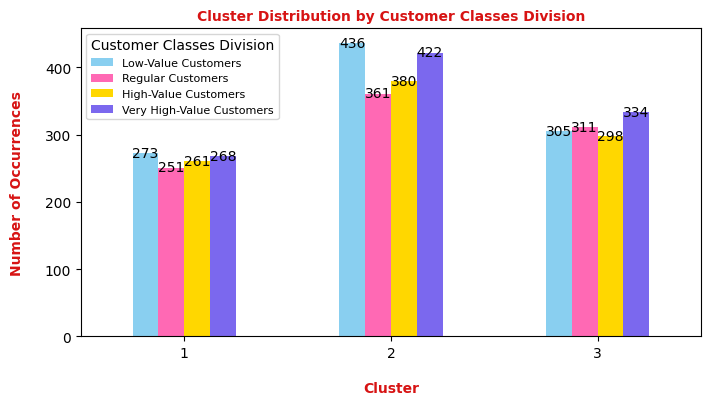

In [ ]:
# Customer Classes Division

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
cluster_gender_counts = df_new.groupby(['Cluster', 'Customer Classes Division']).size().unstack()

# Plotting the grouped bar chart
ax = cluster_gender_counts.plot(kind='bar', stacked=False, color=['#89CFF0', '#FF69B4', '#FFD700', '#7B68EE', '#FF4500', '#9370DB'], figsize=(8, 4))

# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=10, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Cluster', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Cluster Distribution by Customer Classes Division', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Customer Classes Division', title_fontsize='10', fontsize='8')

plt.show()

<Figure size 800x400 with 0 Axes>

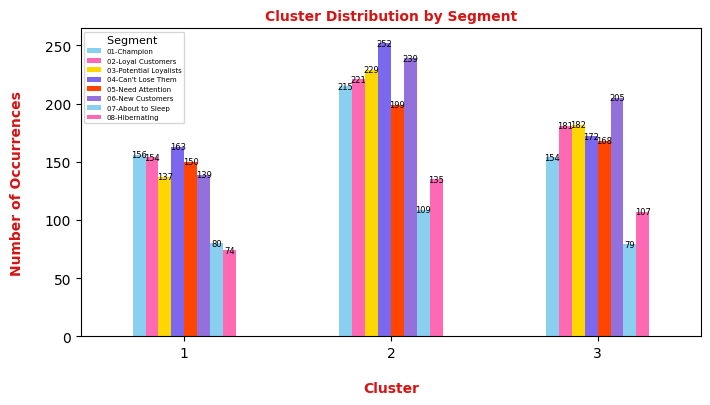

In [ ]:
# Segment

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns "Cluster" and "Gender"

plt.figure(figsize=(8, 4))

# Grouping by "Cluster" and "Gender" and counting occurrences
cluster_gender_counts = df_new.groupby(['Cluster', 'Segment']).size().unstack()

# Plotting the grouped bar chart
ax = cluster_gender_counts.plot(kind='bar', stacked=False, color=['#89CFF0', '#FF69B4', '#FFD700', '#7B68EE', '#FF4500', '#9370DB'], figsize=(8, 4))

# Annotating each bar with the number of occurrences
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', va='center', fontsize=6, color='black')
    ax.tick_params(axis = 'both', labelsize = 10)

plt.xlabel('Cluster', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.ylabel('Number of Occurrences', weight='bold', color='#D71313', fontsize=10, labelpad=15)
plt.title('Cluster Distribution by Segment', weight='bold', color='#D71313', fontsize=10)

plt.xticks(rotation=0)
plt.legend(title='Segment ', title_fontsize='8', fontsize='5')

plt.show()